In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Loads the aligned trajectory
import MDAnalysis as mda
ref = mda.Universe('../sarscov2-10921231-structure/protein_conf.gro')
sim = mda.Universe('../sarscov2-10921231-structure/protein_conf.gro', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_00to02us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_02to04us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_04to06us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_06to08us.xtc', \
                   '../traj_protein_snap_every1ns/protein_snap_every1ns_08to10us.xtc')

In [3]:
# Perform PCA, which will be used to obtain distances
import MDAnalysis.analysis.pca as pca
sim_pca = pca.PCA(sim, select='protein and name CA')
sim_pca.run(start=0)

# Project simulation onto principal components
sim_projection = sim_pca.transform(sim.select_atoms('protein and name CA'))

In [5]:
import numpy as np

# Compute distance between top 10 PCs
ndims = 10
stride = 5
distances = np.array([[np.sqrt(np.sum(np.square(sim_projection[j, :ndims] - sim_projection[k, :ndims]))) \
              for j in range(0, sim_projection.shape[0], stride)] \
                for k in range(0, sim_projection.shape[0], stride)])

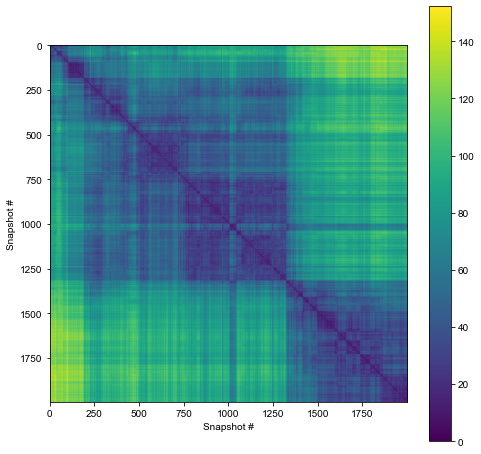

In [6]:
# Show the distance matrix
fig = plt.figure(figsize=(8,8))
im = plt.imshow(distances)
plt.xlabel('Snapshot #')
plt.ylabel('Snapshot #')
plt.colorbar()
plt.savefig('distance_matrix.png')

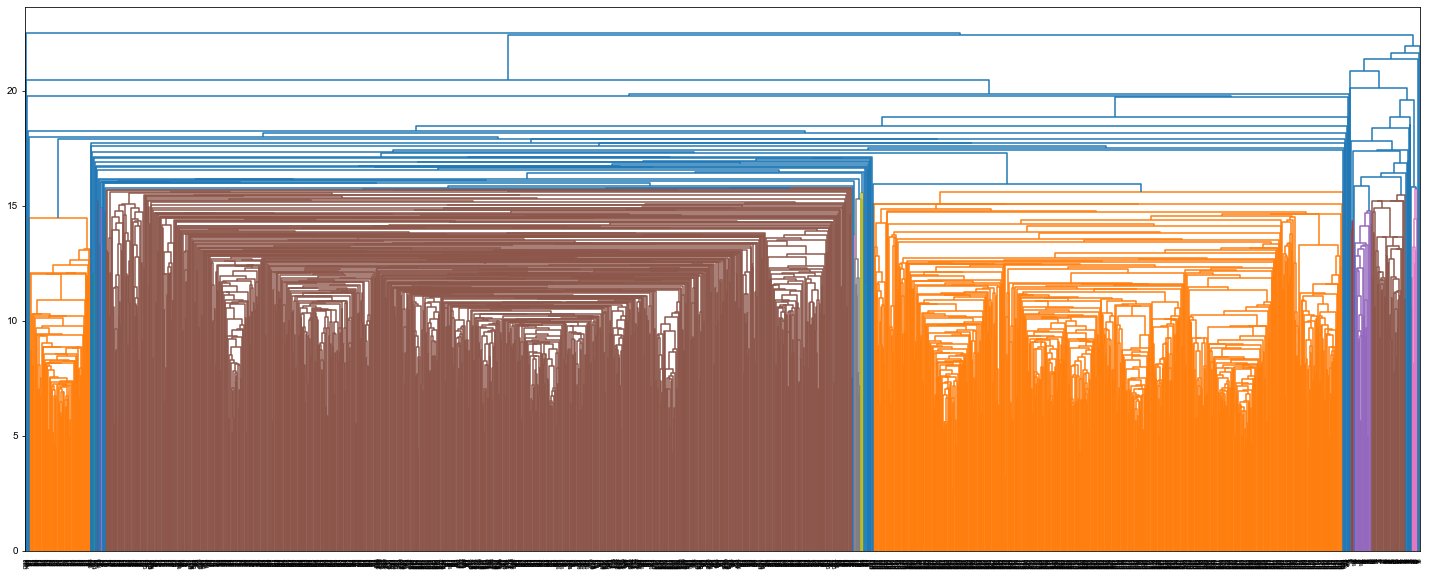

In [7]:
# Generate dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

Z = linkage(squareform(np.array(distances)), 'single', optimal_ordering=True)
fig = plt.figure(figsize=(25, 10))

dn = dendrogram(Z)
plt.savefig('dendrogram.png')

In [8]:
# Cluster every observation in the distance matrix
Z = linkage(squareform(distances), 'single', optimal_ordering=True)

Text(0, 0.5, 'Cluster')

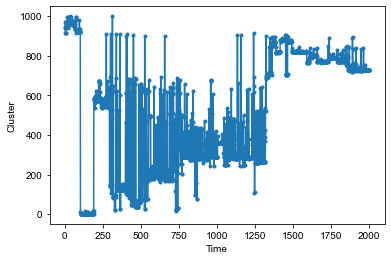

In [10]:
import scipy
fcluster = scipy.cluster.hierarchy.fcluster(Z, 10, criterion='distance')
plt.plot(fcluster,'.-')
plt.xlabel('Time')
plt.ylabel('Cluster')